**Customer Segmenation**

import required libraries

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [28]:
data = pd.read_csv('Dataset for customer project.csv')
data

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...,...
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral


In [29]:
data.shape  #check the data

(350, 11)

In [30]:
data.info()  #checking info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [31]:
data.isnull().sum() # there are two null values

,0
Customer ID,0
Gender,0
Age,0
City,0
Membership Type,0
Total Spend,0
Items Purchased,0
Average Rating,0
Discount Applied,0
Days Since Last Purchase,0


There is some null values in Satisfaction level column. So, we use forwardfill method to fill the null values.

In [32]:
data = data.fillna(method='ffill')

<ipython-input-32-449dda89d9c2>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


In [33]:
data.isnull().sum() # Now,there is no null values

,0
Customer ID,0
Gender,0
Age,0
City,0
Membership Type,0
Total Spend,0
Items Purchased,0
Average Rating,0
Discount Applied,0
Days Since Last Purchase,0


In [34]:
data.columns

Index(['Customer ID', 'Gender', 'Age', 'City', 'Membership Type',
       'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied',
       'Days Since Last Purchase', 'Satisfaction Level'],
      dtype='object')

<Axes: >

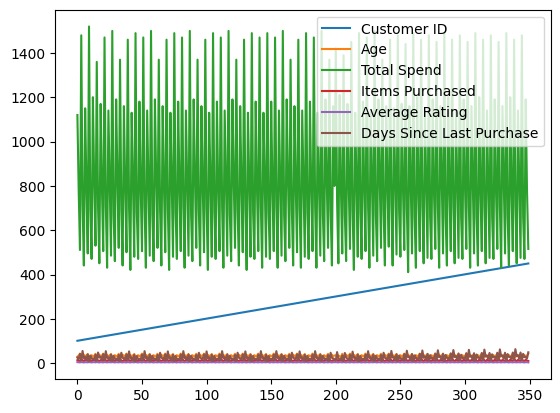

In [35]:
data.plot()

Customer Segmentation
Here I used K-Means Clustering Algorithm

In [36]:
label_encoder = LabelEncoder()   # converting text data into numeric data

In [37]:
data.columns.tolist()

['Customer ID',
 'Gender',
 'Age',
 'City',
 'Membership Type',
 'Total Spend',
 'Items Purchased',
 'Average Rating',
 'Discount Applied',
 'Days Since Last Purchase',
 'Satisfaction Level']

In [38]:
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['City'] = label_encoder.fit_transform(data['City'])
data['Membership Type'] = label_encoder.fit_transform(data['Membership Type'])
data['Satisfaction Level'] = label_encoder.fit_transform(data['Satisfaction Level'])

In [39]:
features = data[['Gender', 'Age', 'City', 'Membership Type', 'Total Spend', 'Items Purchased',
                 'Average Rating', 'Discount Applied', 'Days Since Last Purchase']]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

features_scaled

array([[-1.        , -0.94515206,  0.87807309, ...,  1.00198115,
         1.        , -0.11835933],
       [ 1.        ,  0.08282563, -0.29492531, ...,  0.13947893,
        -1.        , -0.63990676],
       [-1.        ,  1.93318547, -1.46792371, ..., -1.06802418,
         1.        ,  1.14825585],
       ...,
       [-1.        , -0.73955652,  0.87807309, ...,  0.82948071,
         1.        ,  0.10516099],
       [ 1.        ,  0.08282563, -0.29492531, ...,  0.31197937,
        -1.        , -0.41638644],
       [-1.        ,  1.93318547, -1.46792371, ..., -1.24052462,
         1.        ,  1.66980327]])

In [40]:
sum_of_squared_distances = []
K = range(1, 6)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    sum_of_squared_distances.append(kmeans.inertia_)

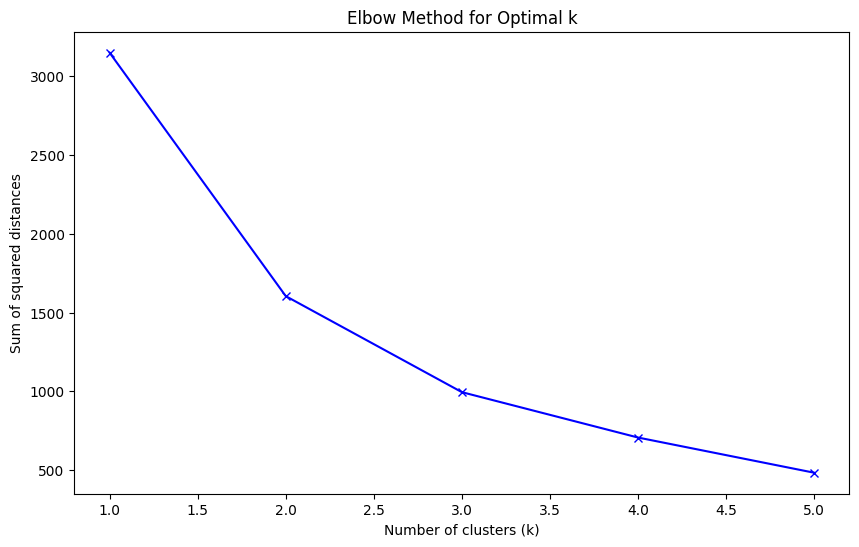

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method for Optimal k')
plt.show()

Define the number of clusters.
Here I defined K =3

In [47]:
optimal_clusters = 4  # Adjust based on the Elbow Method result
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(features_scaled)

Analyze the results

In [48]:
cluster_0_features = ['Total Spend', 'Items Purchased', 'Discount Applied']
cluster_1_features = ['Age', 'City', 'Days Since Last Purchase']
cluster_2_features = ['Membership Type', 'Satisfaction Level', 'Average Rating']
cluster_3_features = ['Gender', 'Total Spend', 'Items Purchased', 'Average Rating']


Visualize the cluster

In [49]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)
data_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
data_pca['Cluster'] = data['Cluster']

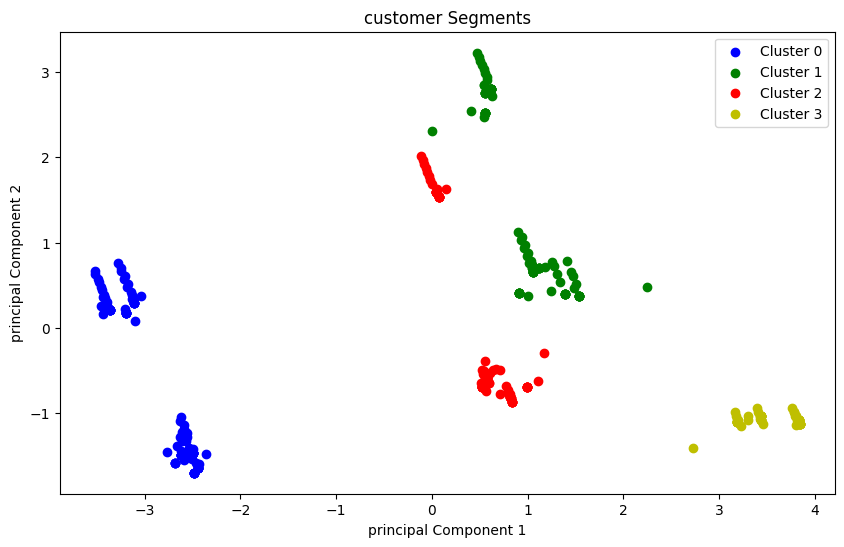

In [64]:
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r','y']
for cluster in range(optimal_clusters):
    cluster_data = data_pca[data_pca['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', c=colors[cluster % len(colors)])

plt.xlabel('principal Component 1')
plt.ylabel('principal Component 2')
plt.title('customer Segments')
plt.legend()
plt.show()


churn prediction


In [66]:
data['Churn'] = (data['Days Since Last Purchase'] > 90).astype(int)   #less than 90 days purchased customers were stored in churn attribute

In [93]:
features = ['Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied', 'Satisfaction Level']
target = 'Churn'

In [68]:
label_encoder = LabelEncoder()  #convert categorical value into numeric
data['Satisfaction Level'] = label_encoder.fit_transform(data['Satisfaction Level'])


In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # spliting the dataset

In [99]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [101]:
y_pred = model.predict(X_test) # prediction on test data

In [105]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 1.00
